In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from fitter import Fitter, get_common_distributions, get_distributions

In [2]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [3]:
url = "/bigdata/jelicicna/output_datasets/anlysis_data_nextbike_2021-07.csv"
df = pd.read_csv(url, sep=';', low_memory=False)

# Distances Analysis

### Inital view of the data

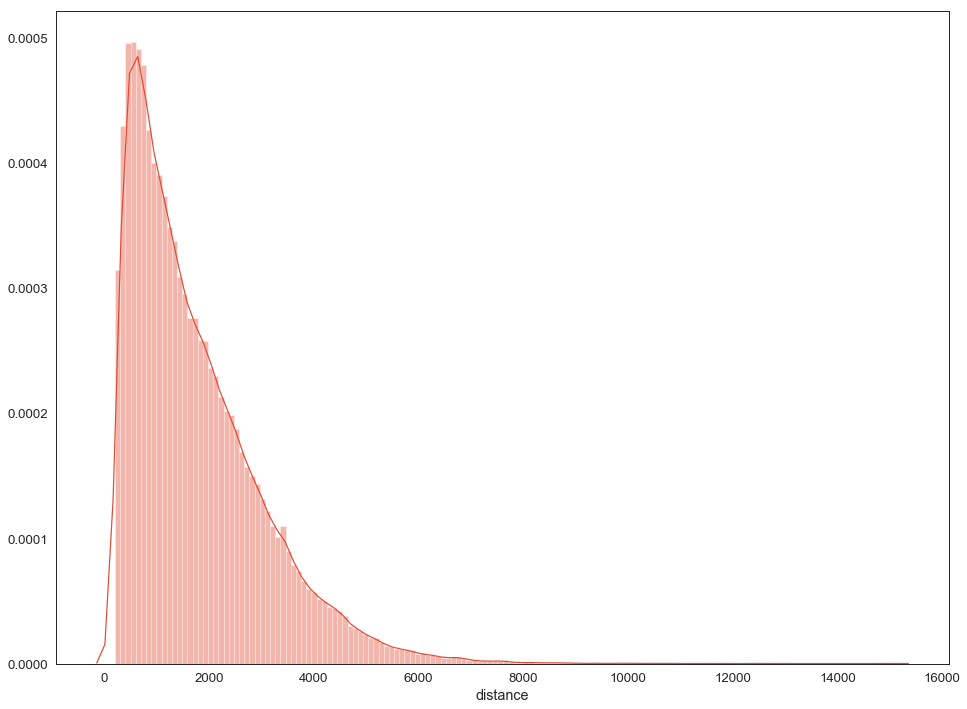

In [4]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df['distance'], bins = 150)

In [5]:
distance = df["distance"].values

#### 5 common distributions

,aic,bic,kl_div,sumsquare_error
beta,4505.081538,-4.515529e+06,inf,1.161326e-08
gamma,3863.620593,-4.477198e+06,inf,1.500636e-08
lognorm,3574.925326,-4.199658e+06,inf,9.595043e-08
burr,3526.761621,-4.138973e+06,inf,1.439455e-07
norm,7371.264406,-3.933420e+06,inf,5.689092e-07


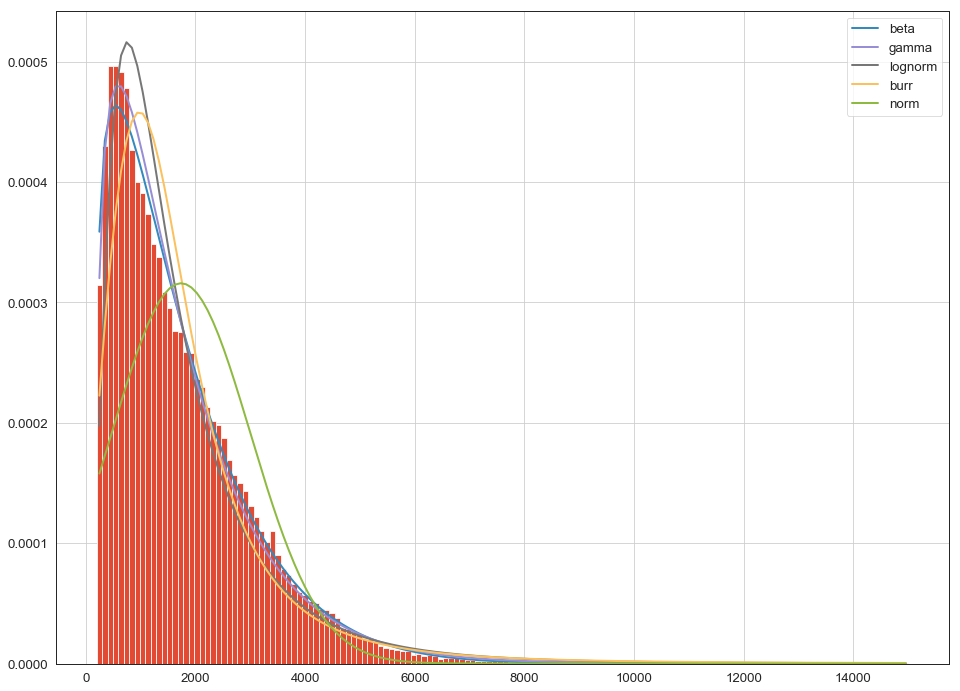

In [6]:
f = Fitter(distance,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins=150)
f.fit()
f.summary()

In [7]:
f.get_best(method = 'sumsquare_error')

{'beta': (1.2357300559184425,
  11.940152223959581,
  199.5727727216951,
  16391.941810424185)}

In [8]:
f.get_best(method = 'aic')

{'burr': (2.6368961890175715,
  0.6724967283890864,
  -10.434941671764719,
  1780.420718250894)}

In [9]:
f.get_best(method = 'bic')

{'beta': (1.2357300559184425,
  11.940152223959581,
  199.5727727216951,
  16391.941810424185)}

### Fitting distributions with regards to the result of 5 from above including variety of common distributions

,aic,bic,kl_div,sumsquare_error
beta,4505.081538,-4.515529e+06,inf,1.161326e-08
burr,3526.761621,-4.138973e+06,inf,1.439455e-07
alpha,3319.281347,-3.967017e+06,inf,4.544305e-07
norm,7371.264406,-3.933420e+06,inf,5.689092e-07
bradford,2907.559097,-3.781036e+06,inf,1.575516e-06


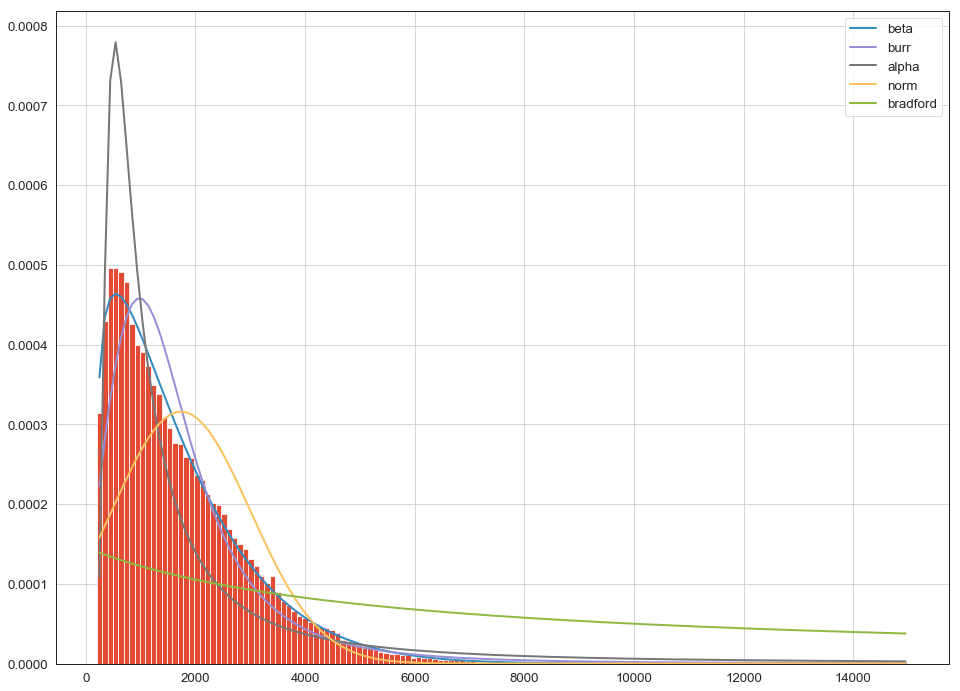

In [10]:
f = Fitter(distance,
           distributions= ['alpha','beta','norm','bradford','burr'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
chi,5022.639469,-4.270360e+06,inf,5.981087e-08
expon,3649.383694,-4.127498e+06,inf,1.554472e-07
dgamma,4629.818335,-3.952721e+06,inf,5.000045e-07
cosine,3133.500969,-3.744986e+06,inf,2.005016e-06
chi2,394836.093277,-3.681581e+06,3.47317,3.063134e-06


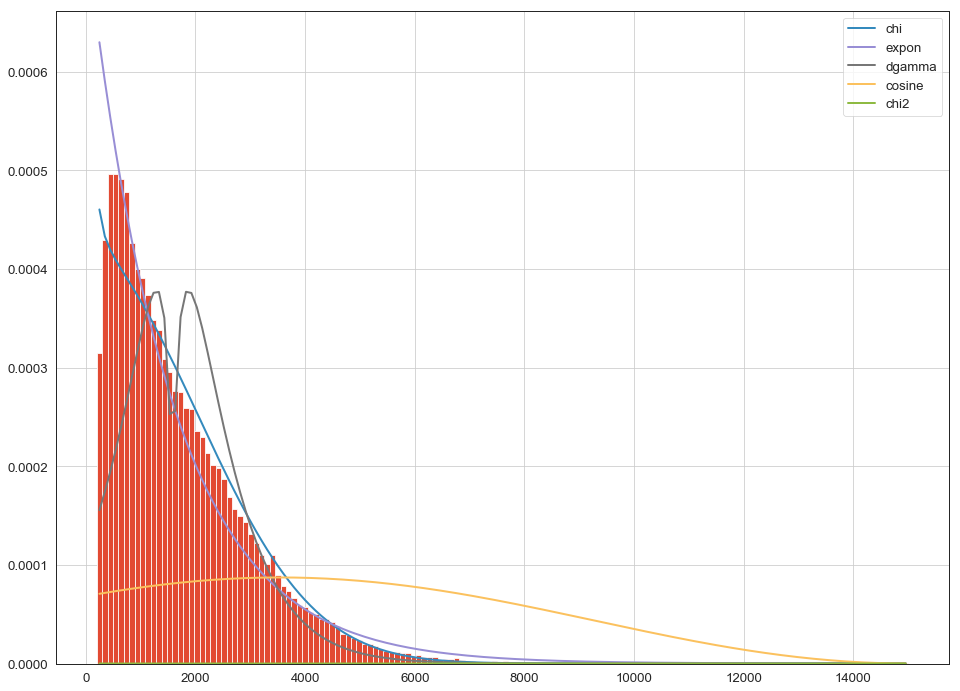

In [11]:
f = Fitter(distance,
           distributions= ['chi','chi2','cosine','dgamma','expon'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
gamma,3863.620593,-4.477198e+06,inf,1.500636e-08
exponnorm,3698.908155,-4.272664e+06,inf,5.889686e-08
fatiguelife,3711.596504,-4.261301e+06,inf,6.354506e-08
fisk,3429.581279,-4.146291e+06,inf,1.370838e-07
f,3560.588153,-4.143542e+06,inf,1.396156e-07


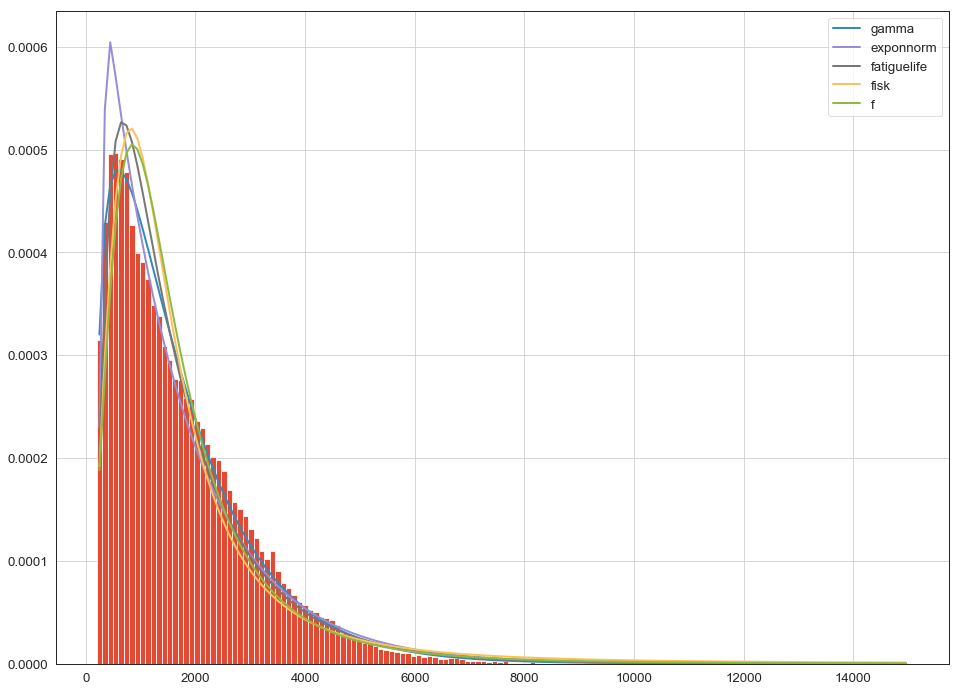

In [12]:
f = Fitter(distance,
           distributions= ['exponnorm','f','fatiguelife','fisk','gamma'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
lognorm,3574.925326,-4.199658e+06,inf,9.595043e-08
genexpon,3709.905633,-4.096451e+06,inf,1.912566e-07
gengamma,3525.854558,-4.083173e+06,inf,2.090264e-07
levy,3224.548637,-3.963571e+06,inf,4.650593e-07
loggamma,7265.856108,-3.931100e+06,inf,5.777565e-07


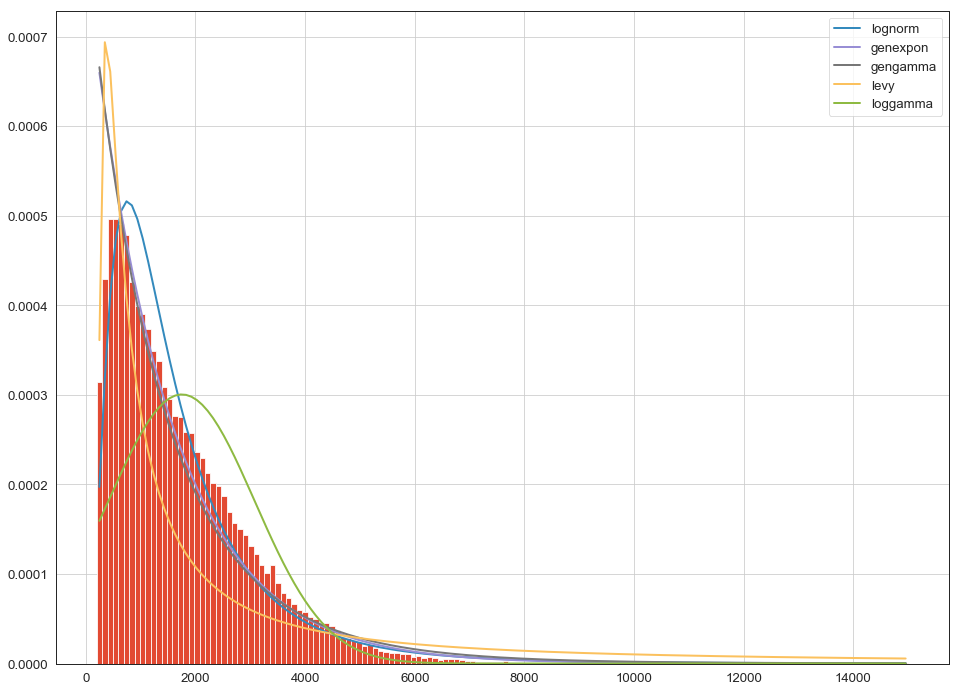

In [13]:
f = Fitter(distance,
           distributions= ['genexpon','gengamma','levy','loggamma','lognorm'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
pearson3,3863.620648,-4.477198e+06,inf,1.500636e-08
logistic,4703.265905,-3.953680e+06,inf,4.968465e-07
t,4602.185057,-3.929865e+06,inf,5.825477e-07
powerlaw,2998.657865,-3.807827e+06,inf,1.317164e-06
pareto,3334.816556,-3.655505e+06,inf,3.646452e-06


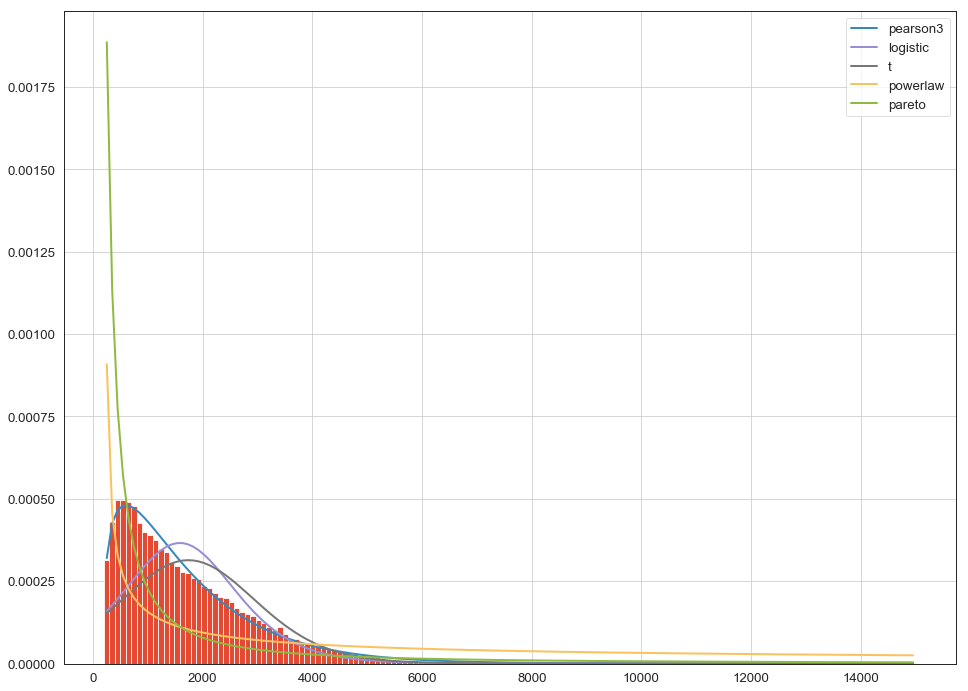

In [14]:
f = Fitter(distance,
           distributions= ['logistic','pareto','pearson3','powerlaw','t'], bins=150)
f.fit()
f.summary()

### 5 best distributions chosen from the above analysis

,aic,bic,kl_div,sumsquare_error
beta,4505.081538,-4.515529e+06,inf,1.161326e-08
gamma,3863.620593,-4.477198e+06,inf,1.500636e-08
pearson3,3863.620648,-4.477198e+06,inf,1.500636e-08
chi,5022.639469,-4.270360e+06,inf,5.981087e-08
gengamma,3525.854558,-4.083173e+06,inf,2.090264e-07


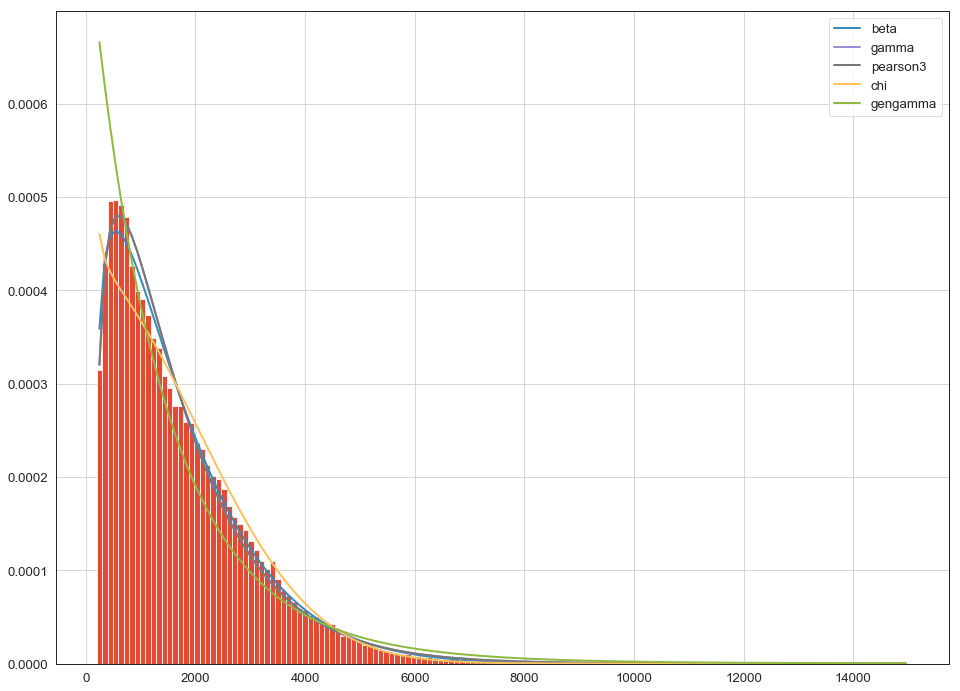

In [15]:
f = Fitter(distance,
           distributions= ['beta','chi','gamma', 'gengamma', 'pearson3'], bins=150)

f.fit()
f.summary()

## Rides Analysis

### Inital view of the data

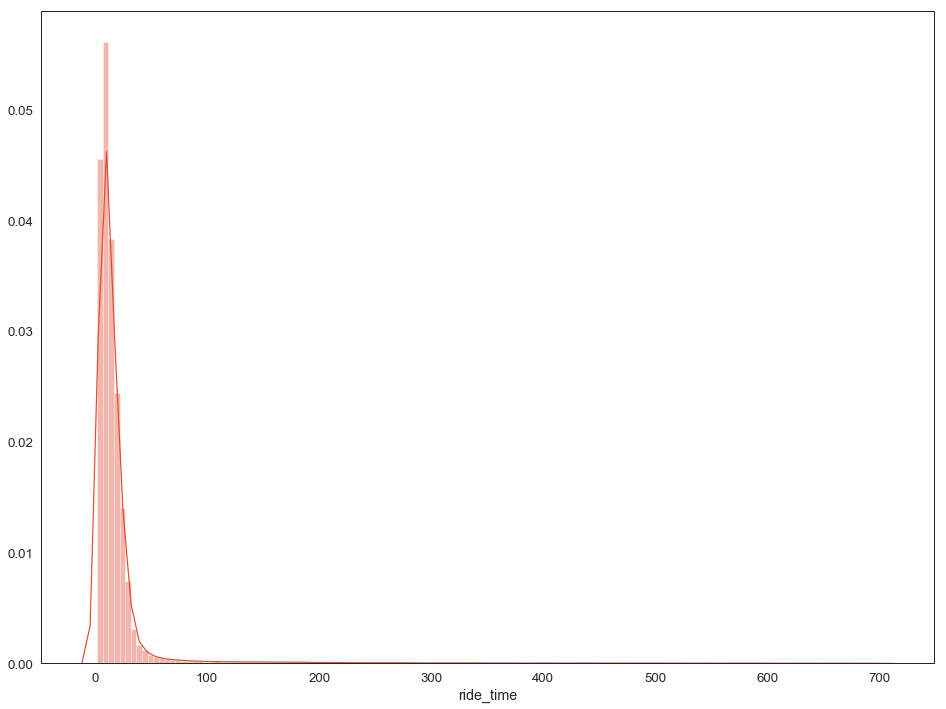

In [16]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df['ride_time'], bins = 140)

In [17]:
rides = df["ride_time"].values

#### 5 common distributions

,aic,bic,kl_div,sumsquare_error
burr,3034.032459,-2.993119e+06,0.042099,0.000305
lognorm,3494.533805,-2.895028e+06,0.071962,0.000588
beta,5290.327526,-2.829395e+06,0.217389,0.000913
gamma,3622.176366,-2.755006e+06,0.368622,0.001501
norm,9873.764464,-2.566548e+06,1.386203,0.005290


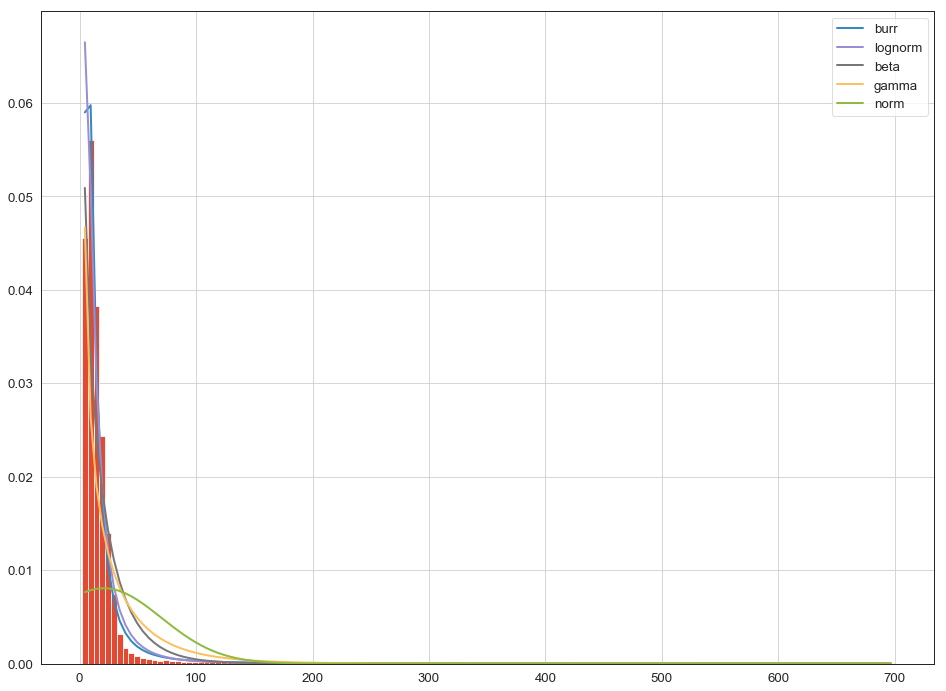

In [18]:
f = Fitter(rides,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins = 140)
f.fit()
f.summary()

In [19]:
f.get_best(method = 'sumsquare_error')

{'burr': (1.7104208418612306,
  4.582934960918147,
  -0.02966296332045721,
  3.7702500953425218)}

In [20]:
f.get_best(method = 'aic')

{'burr': (1.7104208418612306,
  4.582934960918147,
  -0.02966296332045721,
  3.7702500953425218)}

In [21]:
f.get_best(method = 'bic')

{'burr': (1.7104208418612306,
  4.582934960918147,
  -0.02966296332045721,
  3.7702500953425218)}

### Fitting distributions with regards to the result of 5 from above including variety of common distributions

,aic,bic,kl_div,sumsquare_error
alpha,2940.171226,-3.061586e+06,0.027806,0.000193
burr,3034.032459,-2.993119e+06,0.042099,0.000305
beta,5290.327526,-2.829395e+06,0.217389,0.000913
norm,9873.764464,-2.566548e+06,1.386203,0.005290
bradford,1990.508213,-2.544991e+06,2.091879,0.006109


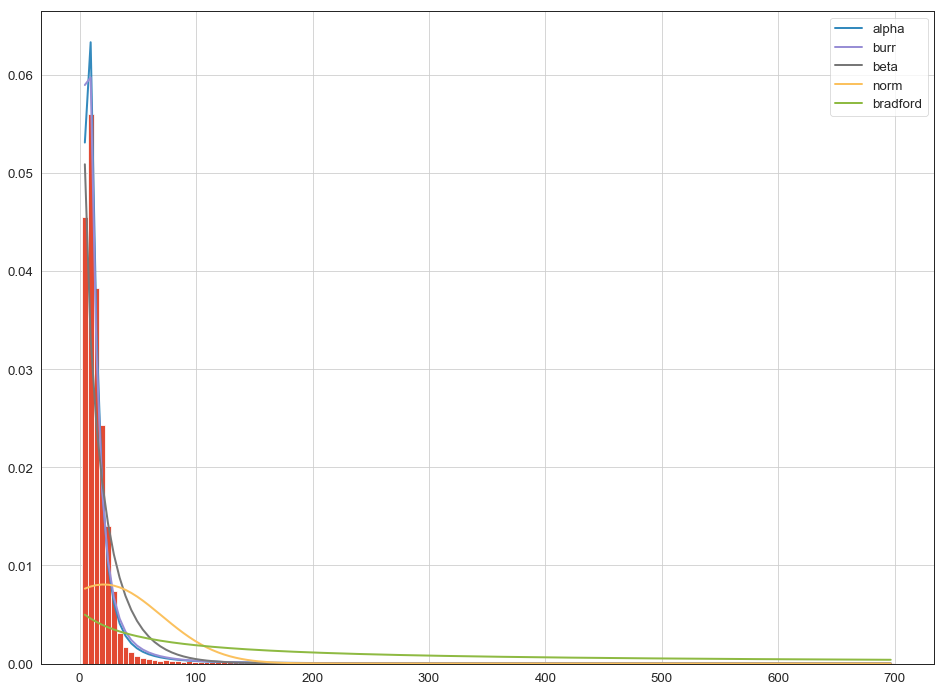

In [22]:
f = Fitter(rides,
           distributions= ['alpha','beta','norm','bradford','burr'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
expon,6019.288964,-2.870684e+06,0.192646,0.000693
chi2,5879.252699,-2.863891e+06,0.200369,0.000725
dgamma,3933.299154,-2.725007e+06,0.153883,0.001834
chi,5412.361811,-2.688938e+06,0.653856,0.002334
cosine,2111.377681,-2.522569e+06,2.762083,0.007098


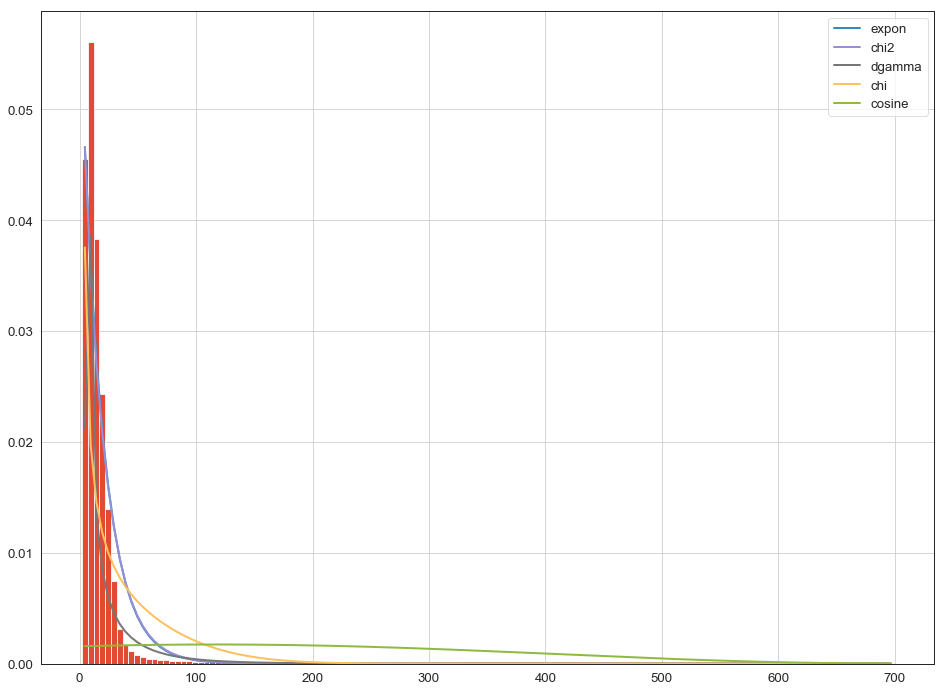

In [23]:
f = Fitter(rides,
           distributions= ['chi','chi2','cosine','dgamma','expon'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
fisk,3128.359869,-3.043286e+06,0.034782,0.000218
f,3089.187671,-2.941830e+06,0.050322,0.000430
exponnorm,6260.469160,-2.900192e+06,0.169397,0.000569
fatiguelife,4374.100322,-2.831801e+06,0.171616,0.000898
gamma,3622.176366,-2.755006e+06,0.368622,0.001501


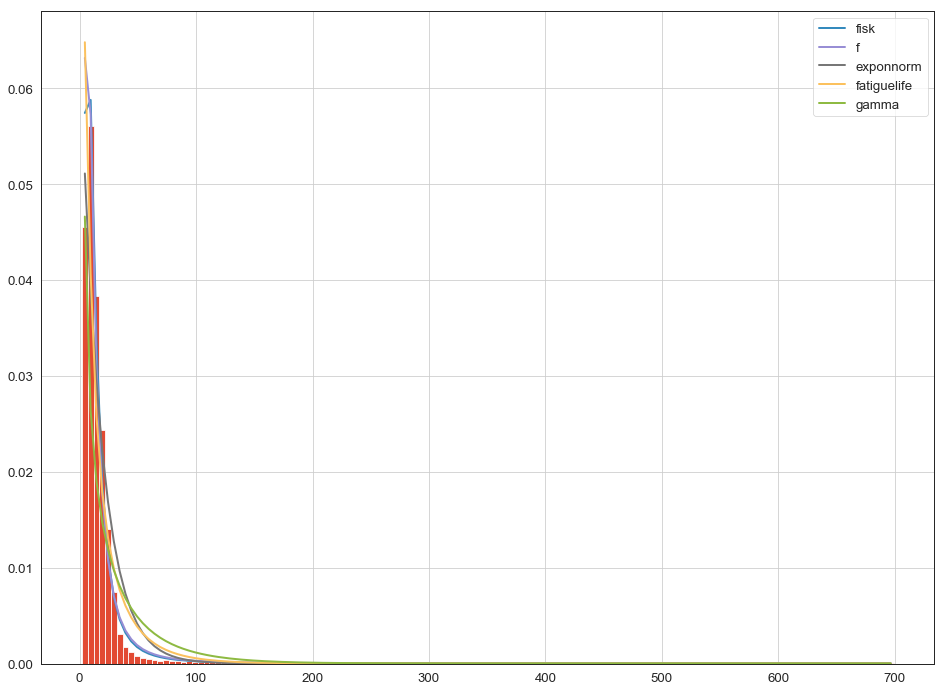

In [24]:
f = Fitter(rides,
           distributions= ['exponnorm','f','fatiguelife','fisk','gamma'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
gengamma,2878.058983,-3.072231e+06,0.085036,0.000180
genexpon,4306.639327,-2.965287e+06,0.183138,0.000368
lognorm,2497.704962,-2.932623e+06,0.068959,0.000458
levy,1678.262351,-2.832250e+06,0.281653,0.000895
loggamma,6288.741552,-2.615037e+06,1.467141,0.003825


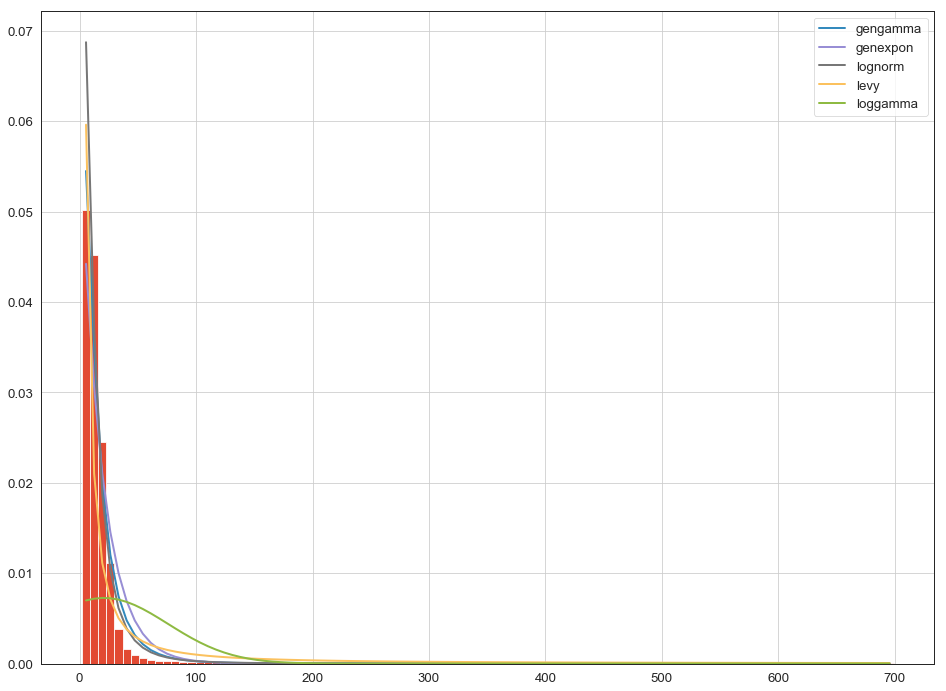

In [25]:
f = Fitter(rides,
           distributions= ['genexpon','gengamma','levy','loggamma','lognorm'], bins = 100)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
t,3290.374992,-2.933026e+06,0.051773,0.000456
pearson3,5621.359473,-2.851112e+06,0.185012,0.000789
logistic,9734.833941,-2.703495e+06,0.278991,0.002118
pareto,2489.946760,-2.645520e+06,0.316384,0.003120
powerlaw,2105.821038,-2.605193e+06,1.181372,0.004085


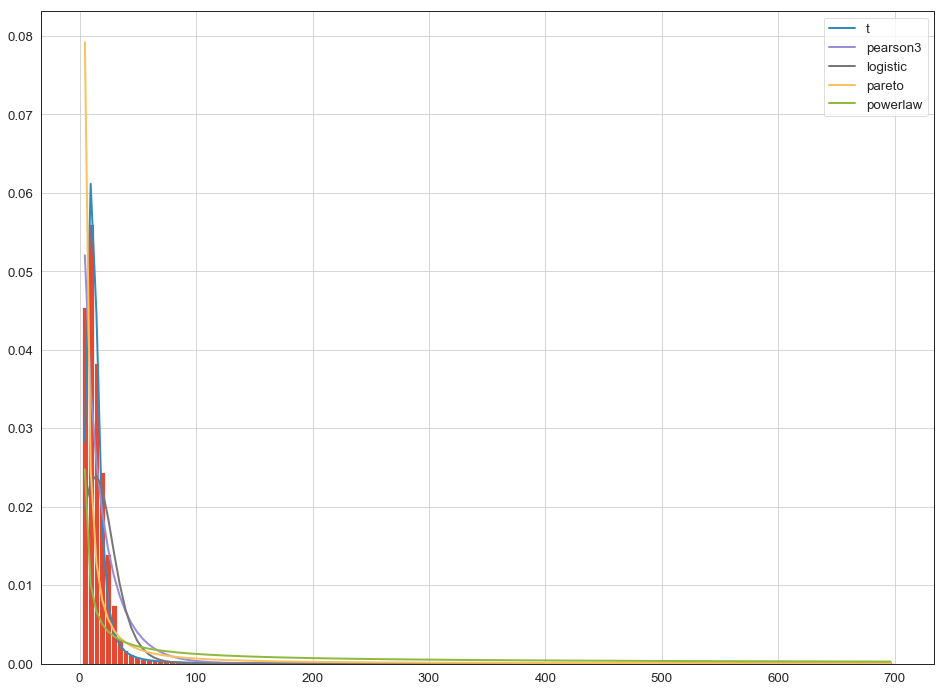

In [26]:
f = Fitter(rides,
           distributions= ['logistic','pareto','pearson3','powerlaw','t'], bins = 140)
f.fit()
f.summary()

### 5 best distributions chosen from the above analysis

,aic,bic,kl_div,sumsquare_error
alpha,2940.171226,-3.061586e+06,0.027806,0.000193
burr,3034.032459,-2.993119e+06,0.042099,0.000305
f,3089.187671,-2.941830e+06,0.050322,0.000430
lognorm,3494.533805,-2.895028e+06,0.071962,0.000588


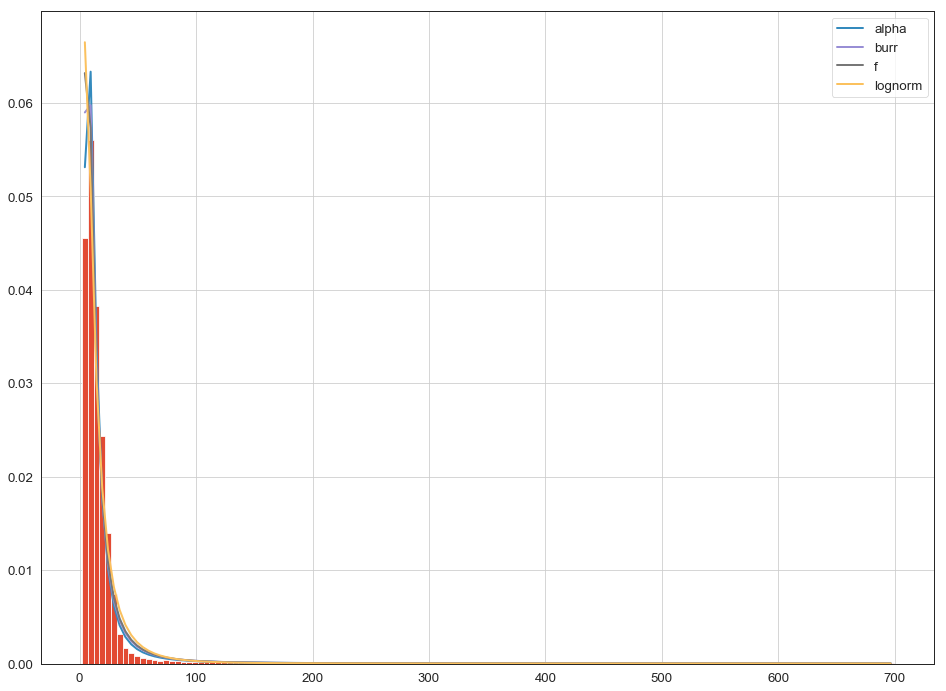

In [27]:
f = Fitter(rides,
           distributions= ['alpha','burr','f', 'lognorm'], bins = 140)
f.fit()
f.summary()